In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# UnicodeDecodeError가 발생할 경우
# 한글이 있으면 : euc-kr
# 한글이 없으면 : ISO-8859-1
df = pd.read_csv('data10/online_retail.csv'
                 , dtype={'CustomerID' : str, 'InvoiceID' : str}
                 , encoding='ISO-8859-1')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 결측치 제거

In [5]:
df.dropna(inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 이상치 제거

In [6]:
df.describe()
# 상품 수량에 음수가 존재한다.

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [7]:
# 상품수량이 음수인 데이터를 제거한다.
df = df.query('Quantity > 0')
df.describe()

,Quantity,UnitPrice
count,397924.000000,397924.000000
mean,13.021823,3.116174
std,180.420210,22.096788
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [8]:
# 상품 가격이 0 이하인 경우를 제거한다.
df = df.query('UnitPrice > 0')
df.describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [9]:
df['StockCode']

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: StockCode, Length: 397884, dtype: object

In [10]:
# 상품 코드가 숫자로만 구성되어 있는 것이 아닌 것은 제거
# 상품 코드가 숫자로만 되어 있는지의 값을 구해서 저장한다.
df['ContaintDigit'] = df['StockCode'].apply(lambda x : any(c.isdigit() for c in x))
df.query('ContaintDigit == False')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContaintDigit
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,False
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,False
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany,False
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,False
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.00,12423,Belgium,False
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518,Germany,False
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662,Germany,False
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526,Germany,False


In [11]:
df = df.query('ContaintDigit == True')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContaintDigit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,True
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,True
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,True
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,True


### 일자별 거래 데이터 분석

In [12]:
# 거래 데이터에서 가장 오래된 데이터와 가장 최신 데이터를 탐색한다.
df['date'] = df['InvoiceDate'].dt.date
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


In [13]:
# 일자별 총 거래 수량을 탐색한다.
date_quantity_series = df.groupby('date')['Quantity'].sum()
date_quantity_series


date
2010-12-01    24208
2010-12-02    31140
2010-12-03    11822
2010-12-05    16370
2010-12-06    16269
              ...  
2011-12-05    37610
2011-12-06    27798
2011-12-07    41080
2011-12-08    27536
2011-12-09    90573
Name: Quantity, Length: 305, dtype: int64

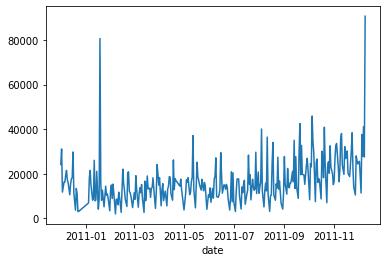

In [14]:
date_quantity_series.plot()
plt.show()

연초와 연말에 거래량이 급증한다

In [15]:
# 일자별 총 거래 횟수를 탐색한다.
# InvoiceNo가 같은 것은 하나의 거래건으로 보고 Invoice가 다른 것들의 수를 계산한다.
date_transaction_series = df.groupby('date')['InvoiceNo'].nunique()
date_transaction_series

date
2010-12-01    121
2010-12-02    136
2010-12-03     57
2010-12-05     87
2010-12-06     94
             ... 
2011-12-05    115
2011-12-06    110
2011-12-07    103
2011-12-08    113
2011-12-09     41
Name: InvoiceNo, Length: 305, dtype: int64

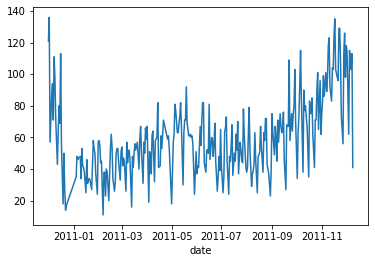

In [16]:
date_transaction_series.plot()
plt.show()

### 일자별 거래된 상품의 unique한 갯수, 즉 상품 거래 다양성

In [17]:
date_unique_item_series = df.groupby('date')['StockCode'].nunique()
date_unique_item_series

date
2010-12-01     939
2010-12-02     905
2010-12-03     671
2010-12-05    1140
2010-12-06     914
              ... 
2011-12-05    1405
2011-12-06    1141
2011-12-07    1044
2011-12-08    1143
2011-12-09     456
Name: StockCode, Length: 305, dtype: int64

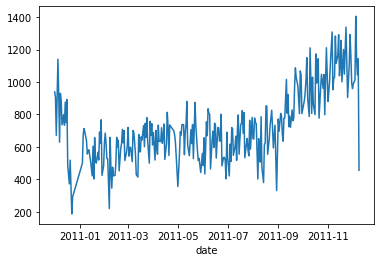

In [18]:
date_unique_item_series.plot()
plt.show()

## 유저별 구매 패턴 분석

In [19]:
# 총 유저수를 계산해서 출력한다.
len(df['CustomerID'].unique())

4334

In [20]:
# 유저별 거래 횟수를 탐색한다.
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_unique_transaction_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

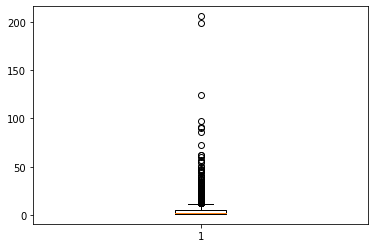

In [21]:
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [22]:
# 유저별 아이템 구매 종류 개수를 탐색한다.
customer_unique_item_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_item_series

CustomerID
12346      1
12347    103
12348     21
12349     72
12350     16
        ... 
18280     10
18281      7
18282     12
18283    262
18287     59
Name: StockCode, Length: 4334, dtype: int64

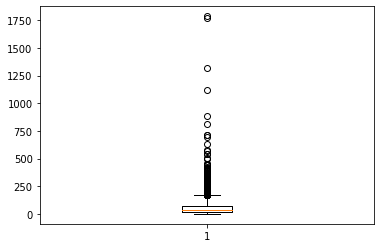

In [23]:
plt.boxplot(customer_unique_item_series.values)
plt.show()

- 총 상품 갯수
- 가장 거래가 많은 상품 top 10 검색
- 상품별 판매수량 분포 탐색
- 거래별 가격 탐색

In [24]:
# 총 상품 갯수
df_Stocks = df.groupby('StockCode').nunique()
len(df_Stocks)

3660

In [25]:
# 가장 거래가 많은 상품 top 10 검색
# df_Stocks2 = df_Stocks.sort_values(by='InvoiceNo', ascending= False)
df_Stocks.nlargest(columns=['InvoiceNo'], n= 10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContaintDigit,date
StockCode,,,,,,,,,,
85123A,1978,1,2,51,1961,6,856,16,1,305
22423,1703,1,1,37,1690,5,881,29,1,300
85099B,1600,1,1,39,1588,8,635,20,1,296
47566,1379,1,1,28,1370,6,708,20,1,287
84879,1375,1,1,37,1365,2,678,16,1,299
20725,1289,1,2,25,1276,3,532,17,1,297
22720,1146,1,1,23,1140,6,640,22,1,248
23203,1080,1,3,23,1068,5,505,15,1,182
20727,1052,1,1,23,1048,2,458,12,1,279


In [26]:
# 가장 거래가 많은 상품 top 10 검색
a1 = df.groupby('StockCode')['InvoiceNo'].nunique()
a2 = a1.sort_values(ascending=False)
a2.head(10)


StockCode
85123A    1978
22423     1703
85099B    1600
47566     1379
84879     1375
20725     1289
22720     1146
23203     1080
20727     1052
22383     1043
Name: InvoiceNo, dtype: int64

In [27]:
# 상품별 판매수량 분포 탐색
df.groupby('StockCode')['Quantity'].sum()

StockCode
10002     823
10080     291
10120     193
10123C      5
10124A     16
         ... 
90214V     14
90214W     12
90214Y     61
90214Z     12
C2        134
Name: Quantity, Length: 3660, dtype: int64

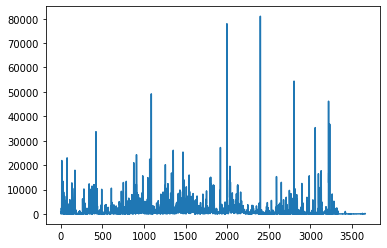

In [28]:
# 상품별 판매수량 분포
a1 = df.groupby('StockCode')['Quantity'].sum()
plt.plot(a1.values)
plt.show()

In [29]:
# 거래별 가격 탐색
df['amount'] = df['Quantity'] * df['UnitPrice']
# display(df['amount'])
a1 = df.groupby('InvoiceNo')['amount'].sum()
display(a1)

InvoiceNo
536365    139.12
536366     22.20
536367    278.73
536368     70.05
536369     17.85
           ...  
581583    124.60
581584    140.64
581585    329.05
581586    339.20
581587    249.45
Name: amount, Length: 18405, dtype: float64

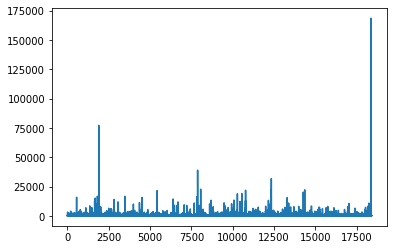

In [30]:
plt.plot(a1.values)
plt.show()

### 구매패턴 분석을 위해 시계열 기준으로 데이터 분리

In [31]:
import datetime

In [32]:
# 2011년 11월을 기준으로 하여, 기준 이전과 이후로 데이터를 분리한다.
df_year_round = df[df['date'] < datetime.date(2011, 11, 1)]
df_year_end = df[df['date'] >= datetime.date(2011, 11, 1)]

print(df_year_round.shape)
print(df_year_end.shape)

(314902, 11)
(81568, 11)


### 분리된 데이터에서 구매 패턴 탐색 : 재구매, 신규 구매 등의 여부

In [33]:
# 11월 이전 데이터에서 구매했던 상품의 셋을 추출한다.
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                              {23166}
12347    {22775, 23175, 22131, 84997C, 22212, 22729, 23...
12348    {21213, 21211, 23076, 84991, 84988, 21985, 229...
12350    {22412, 22551, 22620, 21915, 21864, 21866, 218...
12352    {21754, 22784, 23243, 21314, 22413, 22801, 226...
                               ...                        
18280    {22180, 22495, 22727, 22467, 22611, 22725, 223...
18281    {22467, 23007, 22037, 23008, 23209, 22028, 22716}
18282    {21270, 23295, 21109, 22089, 22424, 21108, 23187}
18283    {22326, 21213, 21121, 22930, 23204, 85099B, 22...
18287    {84507C, 47421, 72349B, 22306, 23076, 22421, 2...
Name: StockCode, Length: 3970, dtype: object


In [34]:
# 11월 이전에 구매한 내역은 old라는 단어를 셋팅해준다.
customer_item_dict = {}

# 11월 이전 구매 건수 만큼 반복한다.
for customer_id, stocks in customer_item_round_set.items():
    #print(customer_id)
    #print(stocks)
    
    #딕셔너리에 담는다.
    customer_item_dict[customer_id]={}
    
    # 현 구매자가 구매한 물품의 수 만큼 반복한다.
    for stock_code in stocks :
        customer_item_dict[customer_id][stock_code]= 'old'
    
print(customer_item_dict['12347'])

{'22775': 'old', '23175': 'old', '22131': 'old', '84997C': 'old', '22212': 'old', '22729': 'old', '23174': 'old', '21041': 'old', '22252': 'old', '84997D': 'old', '47559B': 'old', '23480': 'old', '22805': 'old', '23297': 'old', '23506': 'old', '22494': 'old', '22727': 'old', '22821': 'old', '20719': 'old', '84559B': 'old', '23508': 'old', '20780': 'old', '84559A': 'old', '84992': 'old', '21171': 'old', '22422': 'old', '84969': 'old', '22561': 'old', '23076': 'old', '16008': 'old', '22698': 'old', '21064': 'old', '23177': 'old', '23421': 'old', '21636': 'old', '22195': 'old', '47580': 'old', '22492': 'old', '47567B': 'old', '20966': 'old', '23162': 'old', '21832': 'old', '23316': 'old', '22376': 'old', '23503': 'old', '23308': 'old', '17021': 'old', '20782': 'old', '22417': 'old', '71477': 'old', '85116': 'old', '22432': 'old', '22374': 'old', '23170': 'old', '23146': 'old', '22772': 'old', '85232D': 'old', '21731': 'old', '22375': 'old', '23084': 'old', '20665': 'old', '84625C': 'old',

In [35]:
# 11월 이후 데이터에서 구매하는 상품 셋을 구한다.
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
customer_item_end_set

CustomerID
12347    {23084, 23506, 20719, 23271, 84625A, 23508, 21...
12349    {22326, 22556, 23273, 48185, 23283, 23514, 214...
12352    {23367, 22668, 23096, 23088, 22178, 23368, 226...
12356                                       {21843, 22423}
12357    {22964, 22905, 22306, 22817, 35599D, 21116, 23...
                               ...                        
18272    {22961, 22075, 22966, 22993, 23113, 20914, 229...
18273                                             {79302M}
18274    {84509A, 23243, 21231, 23245, 22851, 84988, 21...
18282                  {23175, 23174, 22818, 22699, 22423}
18283    {22737, 21213, 23204, 85099B, 23581, 22909, 20...
Name: StockCode, Length: 1904, dtype: object

In [36]:
# 11월 이후에 구매한 고객 수 만큼 반복한다.
for customer_id, stocks in customer_item_end_set.items():
    #print(customer_id)
    #print(stocks)
    #print('-----------------------------')

    # 현재 사용자가 11월 이전에 구매한 적이 있는지 확인한다.
    if customer_id in customer_item_dict:
        # 11월 이후에 구매한 상품들의 수 만큼 반복한다.
        for stock_code in stocks :
            # 11월 이전에 구매한 적이 있다면...
            if stock_code in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock_code]='both'
            # 11월 이전에 구매한 적이 없다면 ..
            else :
                customer_item_dict[customer_id][stock_code]= 'new'
    # 현재 사용자가 11월 이전에 구매한 적이 없다면
    else:
        
        customer_item_dict[customer_id]= {}
        for stock_code in stocks :
            customer_item_dict[customer_id][stock_code]= 'new'

In [37]:
# 각 사용자 별로 old. new, both의 수를 계산해 데이터 프레임으로 생성한다.

# 데이터를 담을 딕셔너리
a1 = {
    'CustimerID' : [],
    'old' : [],
    'new' : [],
    'both' : []
}



# 위에서 구한 딕셔너리내의 데이터 수만큼 반복한다.
for customer_id in customer_item_dict :
    #print(customer_id)

    old = 0
    new = 0
    both = 0

    # 해당 사용자내의 딕셔너리의 데이터를 반복해서 가져온다.
    for stock_code in customer_item_dict[customer_id] :
        status = customer_item_dict[customer_id][stock_code]
        if status == 'old' :
            old = old + 1
        elif status == 'new' :
            new = new + 1
        elif status == 'both' :
            both = both + 1

    #print(old, new, both)
    
    # 구한 값을 딕셔너리에 담는다.
    a1['CustimerID'].append(customer_id)
    a1['old'].append(old)
    a1['new'].append(new)
    a1['both'].append(both)
    
# print(a1)
# 데이터 프레임을 생성한다.
df_order_info = pd.DataFrame(a1)
df_order_info

,CustimerID,old,new,both
0,12346,1,0,0
1,12347,92,3,8
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,12,2
...,...,...,...,...
4329,18184,0,1,0
4330,18209,0,8,0
4331,18216,0,26,0
4332,18249,0,8,0


In [38]:
# 사용자의 수를 가져온다.
df_order_info.shape[0]

4334

In [39]:
# 11 이후에 새롭게 유입된 고객의 번호를 가져온다.
a1 = df_order_info.query('old == 0 and both == 0').index
len(a1)

364

## 상품 구매 예측

In [40]:
# 추천 대상 데이터에 포함되는 유저와 삼품의 개수를 출력한다.
print(len(df_year_round['CustomerID'].unique()))
print(len(df_year_round['StockCode'].unique()))

3970
3608


In [41]:
# 사용자가 각 상품을 얼마나 구매했는지 값을 가져온다.
a1 = df_year_round.groupby(['CustomerID', 'StockCode'])['InvoiceNo'].nunique()
uir_df = a1.reset_index()
uir_df

,CustomerID,StockCode,InvoiceNo
0,12346,23166,1
1,12347,16008,1
2,12347,17021,1
3,12347,20665,1
4,12347,20719,3
...,...,...,...
220902,18287,84920,1
220903,18287,85039A,2
220904,18287,85039B,2
220905,18287,85040A,1


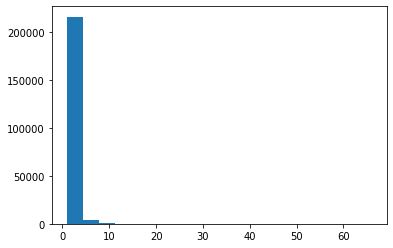

In [42]:
# 재구매수의 분포를 탐색한다.
uir_df['InvoiceNo'].hist(bins='auto', grid=False)
plt.show()

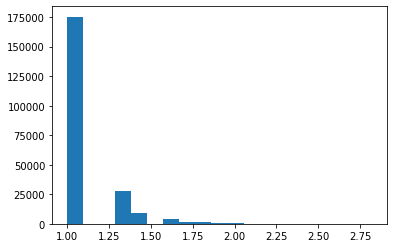

In [43]:
# log 노멀라이징
a1 = uir_df['InvoiceNo'].apply(lambda x : np.log10(x) + 1)
a1.hist(bins='auto', grid=False)
plt.show()

In [44]:
#노멀라이징한 값을 평점으로 사용한다.
uir_df['Rating'] = a1
uir_df

,CustomerID,StockCode,InvoiceNo,Rating
0,12346,23166,1,1.000000
1,12347,16008,1,1.000000
2,12347,17021,1,1.000000
3,12347,20665,1,1.000000
4,12347,20719,3,1.477121
...,...,...,...,...
220902,18287,84920,1,1.000000
220903,18287,85039A,2,1.301030
220904,18287,85039B,2,1.301030
220905,18287,85040A,1,1.000000


In [45]:
# 평점을 1 ~ 5점 사이로 맞춘다.
#최소값
min_value = uir_df['Rating'].min()
# 최대값
max_value = uir_df['Rating'].max()

In [46]:
# 평점을 계산한다.
uir_df['Rating'] = ((uir_df['Rating'] - min_value) / (max_value - min_value) * 4) + 1
uir_df['Rating']


0         1.000000
1         1.000000
2         1.000000
3         1.000000
4         2.048881
            ...   
220902    1.000000
220903    1.661770
220904    1.661770
220905    1.000000
220906    1.000000
Name: Rating, Length: 220907, dtype: float64

In [47]:
uir_df['Rating'].describe()

count    220907.000000
mean          1.189098
std           0.411273
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: Rating, dtype: float64

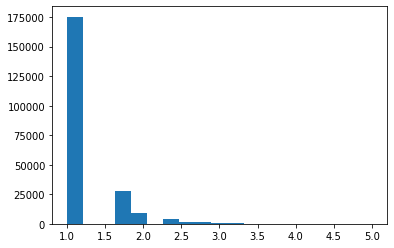

In [48]:
uir_df['Rating'].hist(bins='auto', grid=False)
plt.show()

### 학습한다.

In [49]:
# SVD 모델 학습을 위한 데이터셋을 생성한다.
uir_df = uir_df[['CustomerID', 'StockCode', 'Rating']]
uir_df

,CustomerID,StockCode,Rating
0,12346,23166,1.000000
1,12347,16008,1.000000
2,12347,17021,1.000000
3,12347,20665,1.000000
4,12347,20719,2.048881
...,...,...,...
220902,18287,84920,1.000000
220903,18287,85039A,1.661770
220904,18287,85039B,1.661770
220905,18287,85040A,1.000000


In [50]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [51]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성한다.
# 대략적인 선능을 알아보기 위해 8:2로 구성한다.
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
data

In [52]:
# 학습과 검증 데이터로 나눈다.
train_data, test_data = train_test_split(data, test_size=0.2)

In [53]:
# SVD 모델을 학습한다.
# 시작 시간
train_start = time.time()

# 모델 생성
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=200)

# 학습
model.fit(train_data)

# 종료시간
train_end = time.time()

print(f'총 학습시간 : {train_end - train_start}')

총 학습시간 : 23.760128498077393


In [54]:
# 에측 정확도를 확인한다.
pred = model.test(test_data)

# 정확도를 확인한다.
accuracy.rmse(pred)

RMSE: 0.3385


0.33845887293739885

In [55]:
# 11월 이전 전체를 full trainset으로 하여 학습한다.
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(uir_df[['CustomerID','StockCode','Rating']], reader)
train_data = data.build_full_trainset()

# 학습
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=200)
model.fit(train_data)

### 상품 추천 시뮬레이션
- 이전에 구매하지 않았던 상품 추천
- 이전에 구매했던 상품 다시 추천
- 전체 상품을 대상으로 하여 추천


In [56]:
# 이전에 구매하지 않았던 상품 추천
test_data = train_data.build_anti_testset()
target_user_predictions = model.test(test_data)
target_user_predictions

[Prediction(uid='12346', iid='16008', r_ui=1.189098167280817, est=1, details={'was_impossible': False}),
 Prediction(uid='12346', iid='17021', r_ui=1.189098167280817, est=1.1096994494239885, details={'was_impossible': False}),
 Prediction(uid='12346', iid='20665', r_ui=1.189098167280817, est=1.0227632119839807, details={'was_impossible': False}),
 Prediction(uid='12346', iid='20719', r_ui=1.189098167280817, est=1.333398716940901, details={'was_impossible': False}),
 Prediction(uid='12346', iid='20780', r_ui=1.189098167280817, est=1, details={'was_impossible': False}),
 Prediction(uid='12346', iid='20782', r_ui=1.189098167280817, est=1.1166922822562126, details={'was_impossible': False}),
 Prediction(uid='12346', iid='20966', r_ui=1.189098167280817, est=1.0927309687429279, details={'was_impossible': False}),
 Prediction(uid='12346', iid='21035', r_ui=1.189098167280817, est=1.0950471108617847, details={'was_impossible': False}),
 Prediction(uid='12346', iid='21041', r_ui=1.18909816728081

In [58]:
# 위에서 얻은 결과를 딕셔너리 행태로 만든다..
new_order_prediction_dict = {}

for customer_id, stock_code, _, prediction_rating, _ in target_user_predictions :
    #print(customer_id, stock_code, prediction_rating)
    # 사용자 id가 딕셔너리에 이미 있다면 
    if customer_id in new_order_prediction_dict:
        # 해당 상품이 이미 저장되어 있다면 pass
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            # 해당 상품이 해당 사용자에 없다면 저장한다.
            new_order_prediction_dict[customer_id][stock_code] = prediction_rating
    
    #사용자 id가 딕셔너리에 없다면
    else :
        new_order_prediction_dict[customer_id]= {}
        new_order_prediction_dict[customer_id][stock_code]= prediction_rating

In [60]:
str(new_order_prediction_dict)[:300]

"{'12346': {'16008': 1, '17021': 1.1096994494239885, '20665': 1.0227632119839807, '20719': 1.333398716940901, '20780': 1, '20782': 1.1166922822562126, '20966': 1.0927309687429279, '21035': 1.0950471108617847, '21041': 1.1149574319388709, '21064': 1.2788660634736568, '21154': 1.104490851629642, '21171"

In [64]:
# 사용자의 수 만큼 반복한다.
for customer_id in new_order_prediction_dict:
    # 해당 사용자에대한 정보를 가져온다
    a1 = new_order_prediction_dict[customer_id]
    # 가져온 정보를 Series로 생성한다
    a2 = pd.Series(a1)
    # 예측 평점을 기준으로 내림 차순 정렬한다.
    a3 = a2.sort_values(ascending=False)
    # 상위 5개만 가져와 출력한다.
    print(f'{customer_id} : {a3[:5].index.tolist()}')

12346 : ['84086B', '90119', '85131B', '90042A', '90035A']
12347 : ['20724', '22355', '22356', '22467', '22383']
12348 : ['84086B', '90035A', '22193', '90162C', '21181']
12350 : ['84086B', '85131B', '90035A', '90119', '90042A']
12352 : ['84086B', '85131B', '90119', '90035A', '90042A']
12353 : ['84086B', '85131B', '90119', '85123A', '22197']
12354 : ['84086B', '85131B', '90035A', '90119', '90042A']
12355 : ['84086B', '85131B', '90119', '90042A', '90035A']
12356 : ['84086B', '85123A', '90119', '90042A', '85131B']
12358 : ['84086B', '90119', '85131B', '90042A', '22197']
12359 : ['84086B', '85131B', '90119', 'C2', '90042A']
12360 : ['84086B', '22467', '23000', '85123A', '20727']
12361 : ['84086B', '85131B', '90119', '90035A', '90042A']
12362 : ['84086B', '22197', '85123A', '82582', '84507C']
12363 : ['84086B', '85131B', '90119', '90042A', '90035A']
12364 : ['84086B', '90119', '85131B', '90042A', '22197']
12365 : ['84086B', '90119', '85131B', '90035A', '85099B']
12370 : ['84086B', '85131B', 

12594 : ['22355', '84086B', '79321', '20727', '85099B']
12596 : ['84086B', '90042A', '90035A', '85131B', '90119']
12597 : ['84086B', '85131B', '90119', '90035A', '90042A']
12598 : ['22355', '22041', '21137', '22356', '22726']
12599 : ['C2', '90119', '21494', '22178', '85131B']
12600 : ['15056N', '85123A', 'C2', '82484', '22411']
12601 : ['84086B', 'C2', '90119', '85123A', '85131B']
12602 : ['84086B', '90035A', '85131B', '85123A', '90119']
12604 : ['84086B', '85131B', '90035A', '90119', '90042A']
12607 : ['84086B', '85131B', '90035A', '90119', '90042A']
12609 : ['84086B', '90119', '90035A', '85131B', '90042A']
12610 : ['84086B', '90035A', '90119', '85131B', '90042A']
12611 : ['84086B', '85131B', '90035A', '90042A', '90119']
12612 : ['84086B', '85131B', '90042A', '90119', '90035A']
12613 : ['84086B', '85123A', '21731', '20719', '82600']
12614 : ['84086B', '90035A', '85131B', '90119', '90042A']
12615 : ['84086B', '85131B', '90119', '79321', '47566']
12616 : ['84086B', '90119', '85131B', '

12852 : ['84086B', '85131B', '90035A', '90119', '90042A']
12853 : ['84086B', '85123A', '90042A', '90035A', 'C2']
12854 : ['84086B', '90119', '79321', '85131B', '85099B']
12855 : ['84086B', '85131B', '90042A', '90119', '90035A']
12856 : ['85131B', '84086B', '90119', '90035A', '22697']
12857 : ['84086B', '82582', '85152', '21166', '21175']
12863 : ['84086B', '90035A', '85131B', '90042A', '90162C']
12864 : ['84086B', '85131B', '90119', '90035A', '22726']
12865 : ['84086B', '90035A', '85131B', '90119', '90042A']
12866 : ['84086B', '85131B', '90035A', '90119', '90042A']
12867 : ['22726', '85123A', '22727', '84978', '82486']
12868 : ['C2', '22900', '22727', '82494L', '21034']
12871 : ['84086B', '22659', 'C2', '22197', '85131B']
12872 : ['84086B', '85131B', '82486', '90119', 'C2']
12873 : ['84086B', '85131B', '90119', '90035A', '90042A']
12875 : ['84086B', '85131B', '90119', '85152', '22197']
12876 : ['84086B', '90119', '85131B', '22197', '21094']
12877 : ['21137', '21731', '22326', '22041', 

13095 : ['84086B', '90042A', '90119', '85131B', '90035A']
13097 : ['82486', '22178', '37448', '84086B', '22383']
13098 : ['82486', 'C2', '22178', '37448', '84947']
13099 : ['84086B', '90119', '22197', '85131B', '85099B']
13101 : ['84086B', '85131B', '90119', '90035A', '90042A']
13102 : ['85152', '22423', '20725', 'C2', '21175']
13103 : ['84086B', '85131B', '90119', '90042A', '90035A']
13104 : ['84086B', '85099B', '90035A', '90119', '85131B']
13106 : ['84086B', '90119', '85131B', '22197', '90035A']
13107 : ['84086B', '90119', '85131B', '90035A', '90042A']
13108 : ['84086B', '85099B', '22197', '85131B', '85123A']
13109 : ['84086B', '90035A', '85131B', '90162C', '90042A']
13110 : ['82484', '84086B', '84879', '20725', '20914']
13113 : ['C2', '22178', '85123A', '21539', '21326']
13115 : ['84086B', '90035A', '82582', '85131B', '90162C']
13116 : ['84086B', '85131B', '90119', '90035A', '90042A']
13117 : ['84086B', '90042A', '85131B', '90035A', '90119']
13118 : ['84086B', '22041', '21137', '223

13350 : ['84086B', '90035A', '85131B', '90119', '90042A']
13351 : ['84086B', '90119', '90042A', '85131B', '90035A']
13352 : ['84086B', '85131B', '90035A', '90119', '90042A']
13354 : ['84086B', '85131B', '90035A', '90119', '90042A']
13355 : ['84086B', '85131B', '90119', '90035A', '90042A']
13356 : ['84086B', '90119', '90042A', '90035A', '85131B']
13357 : ['84086B', '85131B', '90119', '90035A', '90042A']
13358 : ['84086B', '90119', '85131B', '90042A', '90035A']
13359 : ['84086B', '85131B', '90119', '90042A', '90035A']
13362 : ['84086B', '90035A', '85131B', '90042A', '90119']
13363 : ['84086B', '85131B', '90035A', '90119', '90042A']
13364 : ['84086B', '90035A', '85131B', '90119', '90162C']
13365 : ['84086B', '85131B', '90035A', '90119', '90042A']
13366 : ['85099B', '84086B', '85123A', '22197', 'C2']
13368 : ['84086B', '85131B', '90119', '90035A', '90042A']
13369 : ['84086B', '90035A', '85131B', '90042A', '90119']
13370 : ['84086B', '85131B', '90119', '90035A', '90042A']
13372 : ['84086B',

13630 : ['84086B', '21519', '21539', '22151', '21464']
13631 : ['84086B', '22197', '20724', '85123A', '90119']
13632 : ['84086B', '85131B', '90042A', '90035A', '90119']
13634 : ['84086B', '90119', '85131B', '90035A', '22197']
13635 : ['84086B', '85131B', '90035A', '90119', '90042A']
13636 : ['90035A', '84086B', '85131B', '22727', '84879']
13637 : ['84086B', '90119', '85131B', '90042A', '90035A']
13639 : ['84086B', '85131B', '90035A', '90042A', '90119']
13642 : ['84086B', '85131B', '90119', '90035A', '90042A']
13643 : ['84086B', '85131B', '90119', '90035A', '90042A']
13644 : ['84086B', '85131B', '90035A', '90119', '90042A']
13645 : ['84086B', '85131B', '90119', '90035A', '90042A']
13647 : ['84086B', '90119', '85131B', '90035A', '90042A']
13649 : ['84086B', '85131B', '90035A', '90119', '90042A']
13650 : ['84086B', '85131B', '85099B', '90035A', '90119']
13651 : ['84086B', '85123A', '22326', '22328', '90042A']
13652 : ['90035A', '84086B', '90119', '85131B', '90042A']
13654 : ['84086B', '85

13901 : ['84086B', '85131B', '90119', '90035A', '90042A']
13904 : ['84086B', '90035A', '90042A', '85131B', '90119']
13908 : ['84086B', '22726', '85131B', '22727', '82582']
13911 : ['84086B', '90042A', '85131B', '90119', '90035A']
13917 : ['84086B', '85123A', '82582', '85152', '85131B']
13918 : ['84086B', '90119', '85131B', '90035A', '90042A']
13919 : ['84086B', '85131B', '90119', '90035A', '90042A']
13922 : ['84086B', '82582', '85131B', '90042A', '90162C']
13923 : ['84086B', '90119', '85131B', '90035A', '90042A']
13924 : ['84086B', '90119', '85131B', '90035A', '90042A']
13925 : ['84086B', '22200', '90042A', '22984', '85175']
13927 : ['84086B', '90042A', '85131B', '90035A', '90119']
13928 : ['84086B', '85131B', '90119', '90042A', '90035A']
13929 : ['84086B', '22041', '22176', '79321', '90035A']
13930 : ['84086B', '85131B', '90119', '90042A', '90035A']
13931 : ['84086B', '90119', '90035A', '85131B', '90042A']
13932 : ['84086B', '90035A', '90119', '85131B', '90042A']
13933 : ['84086B', '8

14175 : ['84086B', '85131B', '90119', '90035A', '90042A']
14176 : ['84086B', '90119', '85099B', '85131B', '90035A']
14177 : ['84086B', '85131B', '90035A', '90119', '90042A']
14178 : ['84086B', '90119', '85131B', '22178', '90042A']
14179 : ['84086B', '90119', '85131B', '90035A', '90042A']
14180 : ['85099B', '85123A', '22197', '21931', '21928']
14184 : ['84086B', '85131B', '90119', '90035A', '90042A']
14185 : ['84086B', '90035A', '85131B', '84879', '90119']
14188 : ['21931', '22197', '22383', '20727', '22384']
14189 : ['85099B', 'C2', '47566', '82482', '22041']
14191 : ['C2', '21931', '22197', '85123A', '20725']
14193 : ['84086B', '90042A', '85131B', '90035A', '90119']
14194 : ['22728', '21754', '21668', '22661', 'C2']
14195 : ['84086B', '85131B', '90119', '90042A', '90035A']
14196 : ['84086B', '85131B', '90119', '90035A', '90042A']
14198 : ['84086B', '85131B', '90035A', '90119', '90042A']
14199 : ['84086B', '85131B', '90119', '90035A', '90042A']
14201 : ['84086B', '85123A', '22727', '22

14442 : ['84086B', '90119', '85131B', '90042A', '90035A']
14443 : ['84086B', '90035A', '85131B', '90119', '90042A']
14446 : ['84086B', '90119', '85131B', '90035A', '90042A']
14447 : ['84086B', '85131B', '90035A', '90119', '90042A']
14448 : ['84086B', '85131B', '90035A', '90042A', '90119']
14449 : ['84086B', '85131B', '90119', '90042A', '90035A']
14450 : ['C2', '84086B', '22900', '85123A', '21166']
14451 : ['84086B', '21137', '90119', '22197', '85099B']
14452 : ['84086B', '90042A', '85131B', '90035A', '90119']
14453 : ['84086B', '90035A', '85131B', '90119', '90042A']
14456 : ['84086B', '90119', '85131B', '22513', '90035A']
14457 : ['84086B', '90119', '85131B', '90035A', '90042A']
14459 : ['84086B', '85131B', '90042A', '90119', '90035A']
14460 : ['84086B', '22726', '85131B', '22727', '90035A']
14461 : ['84086B', '90042A', '90119', '85131B', '90035A']
14462 : ['21175', '82582', '22629', '22630', '22659']
14463 : ['84086B', '85131B', '90035A', '90119', '79321']
14465 : ['84086B', '85131B',

14697 : ['84086B', '85131B', '90119', '90035A', '90042A']
14698 : ['84086B', '90035A', '85131B', '90042A', '90119']
14699 : ['84086B', '85123A', '90042A', '90119', '85131B']
14700 : ['84086B', '84879', '22193', '22041', '90035A']
14701 : ['84086B', '85131B', '90119', '90042A', '90035A']
14702 : ['C2', '85123A', '82482', '21034', '22423']
14704 : ['84086B', '85131B', '90119', '90042A', '90035A']
14705 : ['84086B', '90042A', '85131B', '90119', '85123A']
14708 : ['84086B', '85099B', '90119', '85131B', '22197']
14709 : ['79321', '20725', '85099F', '22383', '22197']
14710 : ['84086B', '90035A', '85131B', '90119', '90042A']
14711 : ['85099B', '22386', '85099C', '84086B', '23203']
14712 : ['84086B', '90035A', '85131B', '90042A', '90119']
14713 : ['22197', '23209', '84947', '84086B', '20914']
14715 : ['84086B', '85131B', '90035A', '90042A', '90119']
14716 : ['84086B', '90035A', '85131B', '90042A', '90119']
14719 : ['84086B', '85131B', '90119', '90035A', '90042A']
14720 : ['84086B', '90119', '8

14921 : ['84086B', '85131B', '90119', '90035A', '90042A']
14923 : ['84086B', '90035A', '90042A', '85131B', '90119']
14924 : ['84086B', '90119', '90035A', '85131B', '90042A']
14930 : ['84086B', '90119', '85131B', '90035A', '90042A']
14931 : ['84086B', '85131B', '90042A', '90119', '90035A']
14932 : ['84086B', '90119', '85131B', '90042A', '90035A']
14934 : ['C2', '84086B', '22659', '22900', '85123A']
14935 : ['84086B', '85131B', '90119', '90035A', '90042A']
14936 : ['85123A', '84086B', '22197', '90119', 'C2']
14937 : ['84086B', '90119', '85131B', '22197', '90042A']
14944 : ['22630', '22629', '85099B', '22197', '47566']
14947 : ['84086B', '90119', '85131B', '90042A', '90035A']
14948 : ['84086B', '82582', '85131B', '90119', '85152']
14951 : ['84086B', '85099B', '85131B', '79321', '90035A']
14952 : ['85131B', '84086B', '90119', '90042A', '21094']
14957 : ['84086B', '85131B', '90119', '90035A', '90042A']
14958 : ['90035A', '17084R', '90119', '21034', '48173C']
14959 : ['82482', '82486', '2272

15158 : ['84086B', '85099B', '22197', '85131B', '22383']
15159 : ['22197', '22383', '85123A', '85099B', '22726']
15160 : ['84086B', '85123A', '85131B', 'C2', '90119']
15163 : ['84086B', '85131B', '90042A', '90119', '90035A']
15164 : ['84086B', '22727', '22726', '21669', '22771']
15165 : ['84086B', '85131B', '90035A', '90119', '90042A']
15167 : ['84086B', '85131B', '90035A', '90119', '90042A']
15171 : ['84086B', '85123A', '90042A', '85131B', '90119']
15172 : ['84086B', '85131B', '90119', '90035A', '90042A']
15174 : ['84086B', '85131B', '90042A', '90119', '90035A']
15175 : ['84086B', '85131B', '90035A', '90119', '90042A']
15178 : ['84086B', '85131B', '90119', 'C2', '90042A']
15179 : ['84086B', '90035A', '90042A', '85131B', '90119']
15180 : ['84086B', '85131B', '90119', '90035A', '90042A']
15181 : ['84086B', '82582', '85131B', '85152', '90119']
15182 : ['84086B', '85123A', 'C2', '22178', '90042A']
15184 : ['84086B', '90119', '85131B', '90042A', '90035A']
15185 : ['84086B', '85131B', '9011

15433 : ['84086B', '90035A', '85131B', '90119', '90042A']
15434 : ['84086B', '90119', '85131B', '90042A', '90035A']
15436 : ['84086B', '85131B', '90042A', '90119', '90035A']
15437 : ['84086B', '85131B', '90042A', '90119', '90035A']
15438 : ['84086B', '90035A', '85131B', '90119', '90042A']
15440 : ['84086B', '90035A', '90042A', '90119', '85131B']
15442 : ['84086B', '90035A', '85131B', '90042A', '90119']
15443 : ['84086B', '22041', '85099B', '82482', '90035A']
15444 : ['84086B', '90119', '85131B', '90042A', '90035A']
15445 : ['84086B', '90035A', '90119', '90042A', '85131B']
15447 : ['84086B', '90035A', '85131B', '90119', '90042A']
15448 : ['84086B', '85131B', '90119', '90042A', '90035A']
15449 : ['84086B', '85123A', '90042A', '84879', '90119']
15452 : ['84086B', '85131B', '90035A', '90119', '90042A']
15453 : ['84879', '22192', '22193', '90035A', '21670']
15454 : ['84086B', '85131B', '90119', '90035A', '90042A']
15456 : ['84086B', '90035A', '90162C', '85099B', '85131B']
15457 : ['84086B',

15719 : ['22197', '22630', 'C2', '22659', '22558']
15722 : ['84086B', '22727', '22726', '22728', '22178']
15723 : ['84086B', '85131B', '90035A', '90119', '90042A']
15724 : ['84086B', '85131B', '90119', '90042A', '90035A']
15727 : ['C2', '84086B', '21175', '47566', '21166']
15729 : ['84086B', '90035A', '85131B', '90119', '85123A']
15730 : ['84086B', '90035A', '85131B', '90119', '90042A']
15732 : ['84086B', '90119', '85123A', '85131B', '90035A']
15733 : ['84086B', '90119', '85131B', '90035A', '90042A']
15734 : ['84086B', '85131B', '90035A', '90119', '90042A']
15737 : ['84086B', '85123A', '82484', '15056N', '22411']
15738 : ['85114A', '22355', '21494', '22380', '22755']
15739 : ['84086B', '22197', '22383', '85099B', '20727']
15740 : ['84086B', '22197', '90119', '85131B', '82600']
15743 : ['84086B', '90035A', '85099B', '90119', '22041']
15744 : ['84086B', '85131B', '90119', '90035A', '22197']
15745 : ['84086B', '85131B', '90119', '90035A', '90042A']
15746 : ['84086B', '90035A', '85131B', '

16015 : ['84086B', '90035A', '85131B', '90119', '90042A']
16016 : ['84086B', '90042A', '85131B', '90035A', '90119']
16017 : ['84086B', '85131B', '90119', '90042A', '90035A']
16018 : ['84086B', '85131B', '90035A', '90119', '90042A']
16019 : ['84086B', '82486', '85131B', '90119', '90042A']
16020 : ['84086B', '85131B', '90042A', '90035A', '82486']
16022 : ['84086B', '85131B', '90035A', '90119', '90042A']
16023 : ['84086B', '22326', '90119', '21137', '22197']
16026 : ['84086B', '85131B', '90042A', '90119', '90035A']
16027 : ['85123A', 'C2', '21034', '22993', '84086B']
16029 : ['82582', '23203', '22197', '22631', '82482']
16030 : ['84086B', '85131B', '90035A', '90042A', '90119']
16031 : ['84086B', '90035A', '90042A', '85131B', '90119']
16033 : ['85099B', '82486', '23203', '20725', '20914']
16034 : ['90035A', '85131B', '84086B', '22887', '17084R']
16036 : ['84086B', '85131B', '90119', '90035A', '90042A']
16037 : ['84086B', '85131B', '90035A', '90042A', '90119']
16038 : ['84086B', '90035A', '

16282 : ['84086B', '90042A', '85131B', '90119', '90035A']
16283 : ['84086B', '22383', '20725', '20727', '20726']
16284 : ['84086B', '90119', '90035A', '85131B', '90042A']
16287 : ['84086B', '85131B', '90119', '22197', '90042A']
16292 : ['84086B', '85131B', '90119', '90035A', '90042A']
16293 : ['84086B', '85131B', '90042A', '90035A', '90119']
16295 : ['84086B', '85131B', '90119', '90042A', '90035A']
16297 : ['84086B', '90119', '90035A', '85131B', '90042A']
16298 : ['84086B', '85131B', '90119', 'C2', '85152']
16302 : ['84086B', '85131B', '90119', '90042A', '90035A']
16303 : ['84086B', '85131B', '90035A', '90119', '90042A']
16305 : ['84086B', '85131B', '90042A', '90119', '90035A']
16306 : ['84086B', '90035A', 'C2', '85131B', '85099B']
16308 : ['84086B', '85131B', '90119', '90042A', '85099B']
16309 : ['84086B', '85131B', '90119', '90042A', '20727']
16311 : ['84086B', '85131B', '90042A', '90119', '90035A']
16313 : ['84086B', '90042A', '90119', '85131B', '90035A']
16315 : ['84086B', '85131B'

16584 : ['84086B', '90119', '85131B', '90042A', '85123A']
16586 : ['84086B', '85131B', '90119', '90035A', '85099B']
16587 : ['84086B', '85131B', '90119', '90035A', '90042A']
16589 : ['84086B', '85131B', '90119', '90042A', '90035A']
16591 : ['84086B', '90119', '85131B', '22197', '90042A']
16592 : ['84086B', '22326', '85123A', '20727', '21731']
16593 : ['84086B', '85131B', '90119', '90035A', '85099B']
16594 : ['84086B', '85131B', '90035A', '90119', '90042A']
16595 : ['84086B', '85131B', '90035A', '90119', '90042A']
16596 : ['84086B', '85131B', '90119', '90035A', '90042A']
16598 : ['84086B', '90119', '85131B', '90042A', '90035A']
16600 : ['84086B', '90119', '85131B', '90042A', '90035A']
16601 : ['84086B', '85131B', '90119', '90042A', '90035A']
16603 : ['84086B', '85131B', '90119', '90035A', '90042A']
16607 : ['85131B', '90035A', '84086B', 'C2', '82486']
16609 : ['82486', '84086B', '22411', '20914', '20727']
16610 : ['84086B', '85131B', '90035A', '90042A', '90119']
16611 : ['84086B', '8513

16848 : ['84086B', '85131B', '90119', '90042A', '90035A']
16849 : ['84086B', '85131B', '90119', '90035A', '90042A']
16850 : ['84086B', '90119', '85131B', '90035A', '85123A']
16851 : ['84086B', '85131B', '90119', '90035A', '90042A']
16852 : ['84086B', '85131B', '90035A', '90119', '90042A']
16855 : ['84086B', '90042A', '90119', '85131B', '90035A']
16858 : ['84086B', '85131B', '90035A', '90119', '90042A']
16859 : ['84086B', '90119', '85131B', '90035A', '90042A']
16861 : ['84086B', '85131B', '90119', '90035A', '90042A']
16863 : ['84086B', '90119', '85131B', '90035A', '90042A']
16866 : ['84086B', '85099B', '79321', '22041', '90035A']
16869 : ['84086B', '85131B', '90119', '90035A', '90042A']
16871 : ['84086B', '90119', '85131B', '90035A', '90042A']
16872 : ['84086B', '85131B', '22197', '90119', '82486']
16873 : ['84086B', '22197', '22326', '90119', '21137']
16875 : ['84086B', '90042A', '85131B', '90035A', '21519']
16877 : ['84086B', '85099B', '20727', '22383', '22197']
16878 : ['84086B', '85

17158 : ['84086B', '85131B', '90035A', '22727', '90042A']
17159 : ['84086B', '85131B', '90042A', '90035A', '90119']
17160 : ['82486', '22726', '22727', '37448', '82483']
17162 : ['84086B', '85131B', '90119', '82486', '90042A']
17163 : ['84086B', '85099B', '22197', '90119', '85131B']
17164 : ['85123A', 'C2', '82484', '22423', '21034']
17165 : ['84086B', '85123A', '85131B', '90119', '90035A']
17166 : ['84086B', '85131B', '90119', '90042A', '90035A']
17169 : ['84086B', '90119', '85131B', '90042A', '90035A']
17171 : ['84086B', '85131B', '90119', '90035A', '90042A']
17172 : ['84086B', '85131B', '90119', '90042A', '90035A']
17173 : ['84086B', '85131B', '22630', '90042A', '21175']
17174 : ['84086B', '85131B', '90119', '22178', '90042A']
17175 : ['22178', 'C2', '21539', '84086B', '21519']
17176 : ['84086B', '85131B', '90035A', '90119', '90042A']
17179 : ['84086B', '90035A', '21116', '79321', '22212']
17180 : ['82486', '84086B', '22726', '22727', '22383']
17181 : ['84086B', '85131B', '90035A', 

17460 : ['84086B', '79321', '47566', '15056N', '21326']
17462 : ['84086B', '90119', '85131B', '90035A', '90042A']
17463 : ['84086B', '85131B', '22178', '90042A', '90119']
17464 : ['84086B', '85131B', '90035A', '90119', '85099B']
17466 : ['84086B', '90035A', '85131B', '90119', '90042A']
17469 : ['79321', '84086B', '82486', '22383', '20914']
17470 : ['84086B', '85099B', '85123A', '22197', '85131B']
17472 : ['84086B', '85131B', '90119', 'C2', '90042A']
17475 : ['84086B', '90119', '85131B', '90035A', '90042A']
17480 : ['84086B', '85131B', '90035A', '90119', '90042A']
17481 : ['84086B', '85131B', '90035A', '90119', '90042A']
17483 : ['84086B', '90042A', '85131B', '90119', '90035A']
17486 : ['84086B', '90119', '85131B', '90035A', '90042A']
17489 : ['84086B', '85131B', '90119', '90042A', '90035A']
17490 : ['84086B', '90035A', '90042A', '90119', '85131B']
17491 : ['84086B', '90035A', '85131B', '85123A', '90119']
17492 : ['84086B', '85131B', '90035A', '90119', '90042A']
17496 : ['84086B', '8513

17742 : ['84086B', '90042A', '90035A', '85131B', '90119']
17744 : ['84086B', '90035A', '90042A', '85131B', '16020C']
17746 : ['84086B', '90035A', '79321', '85131B', '90119']
17747 : ['84086B', '85131B', '85123A', '90119', '90042A']
17749 : ['84086B', '90119', '85131B', '22197', '90042A']
17750 : ['22467', '22927', '22726', '22133', '82482']
17752 : ['84086B', '85131B', '90119', '22197', '90035A']
17754 : ['84086B', '85131B', '90119', '90042A', '90035A']
17757 : ['85099B', '22386', '22041', '20713', '82001S']
17758 : ['82482', '84086B', '22726', '82486', '85123A']
17759 : ['84086B', '90119', '85131B', '90042A', '90035A']
17760 : ['84086B', '85131B', '90119', '90035A', '90042A']
17763 : ['84086B', '85131B', '90119', '22726', '22178']
17764 : ['84086B', '85131B', '90119', '90042A', '90035A']
17765 : ['84086B', '85131B', '90035A', '90042A', '90119']
17768 : ['84086B', '90119', '85131B', '90042A', '90035A']
17769 : ['C2', '22900', '22728', '22699', '84086B']
17770 : ['84086B', '90035A', '85

18048 : ['84086B', '85123A', '90119', '90042A', '85131B']
18050 : ['84086B', '85131B', '90119', '90035A', '90042A']
18053 : ['84086B', '85131B', '90035A', '90119', '90042A']
18055 : ['22727', '82484', 'C2', '22726', '84086B']
18056 : ['84086B', '90035A', '85131B', '90119', '90042A']
18059 : ['84086B', '85131B', '90119', '90035A', '85099B']
18061 : ['21175', '22193', '85123A', '22629', '21166']
18062 : ['84086B', '85131B', '82486', '20727', '90042A']
18064 : ['84086B', '85131B', '90119', '90042A', '90035A']
18065 : ['84086B', '82486', '84879', '85131B', '21519']
18066 : ['84086B', '90119', '85131B', '90042A', '90035A']
18067 : ['84086B', '90035A', '85131B', '90042A', '90119']
18068 : ['84086B', '90119', '85131B', '90035A', '90042A']
18069 : ['84086B', '82486', '82484', '85131B', '20914']
18071 : ['84086B', '85131B', '85099B', '90119', '90035A']
18072 : ['84086B', '85131B', '90119', '90042A', '90035A']
18073 : ['22151', '85114C', '21519', '21539', '85129D']
18074 : ['84086B', '90119', '8

In [65]:
# 이전에 구매했던 상품을 대상으로 예측하낟.
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)
target_user_predictions

[Prediction(uid='12346', iid='23166', r_ui=1.0, est=1.0141075184591954, details={'was_impossible': False}),
 Prediction(uid='12347', iid='16008', r_ui=1.0, est=1.0629277858472237, details={'was_impossible': False}),
 Prediction(uid='12347', iid='17021', r_ui=1.0, est=1.2817575270057637, details={'was_impossible': False}),
 Prediction(uid='12347', iid='20665', r_ui=1.0, est=1.1195855372048402, details={'was_impossible': False}),
 Prediction(uid='12347', iid='20719', r_ui=2.0488809759409814, est=2.070509679678085, details={'was_impossible': False}),
 Prediction(uid='12347', iid='20780', r_ui=1.0, est=1.043820574001668, details={'was_impossible': False}),
 Prediction(uid='12347', iid='20782', r_ui=1.0, est=1.3266333643284816, details={'was_impossible': False}),
 Prediction(uid='12347', iid='20966', r_ui=1.0, est=1.4227491425467935, details={'was_impossible': False}),
 Prediction(uid='12347', iid='21035', r_ui=1.0, est=1.4242037141432957, details={'was_impossible': False}),
 Prediction(uid

In [66]:
# 위에서 얻은 결과를 딕셔너리 행태로 만든다..
new_order_prediction_dict = {}

for customer_id, stock_code, _, prediction_rating, _ in target_user_predictions :
    #print(customer_id, stock_code, prediction_rating)
    # 사용자 id가 딕셔너리에 이미 있다면 
    if customer_id in new_order_prediction_dict:
        # 해당 상품이 이미 저장되어 있다면 pass
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            # 해당 상품이 해당 사용자에 없다면 저장한다.
            new_order_prediction_dict[customer_id][stock_code] = prediction_rating
    
    #사용자 id가 딕셔너리에 없다면
    else :
        new_order_prediction_dict[customer_id]= {}
        new_order_prediction_dict[customer_id][stock_code]= prediction_rating

In [67]:
str(new_order_prediction_dict)[:300]

"{'12346': {'23166': 1.0141075184591954}, '12347': {'16008': 1.0629277858472237, '17021': 1.2817575270057637, '20665': 1.1195855372048402, '20719': 2.070509679678085, '20780': 1.043820574001668, '20782': 1.3266333643284816, '20966': 1.4227491425467935, '21035': 1.4242037141432957, '21041': 1.40109572"

In [68]:
# 사용자의 수 만큼 반복한다.
for customer_id in new_order_prediction_dict:
    # 해당 사용자에대한 정보를 가져온다
    a1 = new_order_prediction_dict[customer_id]
    # 가져온 정보를 Series로 생성한다
    a2 = pd.Series(a1)
    # 예측 평점을 기준으로 내림 차순 정렬한다.
    a3 = a2.sort_values(ascending=False)
    # 상위 5개만 가져와 출력한다.
    print(f'{customer_id} : {a3[:5].index.tolist()}')

12346 : ['23166']
12347 : ['22726', '20719', '21731', '22728', '22423']
12348 : ['23078', '23077', '22616', '23076', '21213']
12350 : ['22348', '84086C', '22412', '21832', '21864']
12352 : ['37448', '22423', '22801', '22692', '21914']
12353 : ['37450', '37446', '37449', '22890']
12354 : ['22630', '22326', '23052', '22215', '22983']
12355 : ['22649', '85040A', '22423', '22699', '22890']
12356 : ['22649', '21843', '22423', '21527', '21212']
12358 : ['15056N', '20679', '22059', '21232', '48185']
12359 : ['22699', '22697', '22698', '22423', '85099B']
12360 : ['22326', '22328', '84997A', '21559', '84997D']
12361 : ['22630', '20725', '22555', '20726', '22631']
12362 : ['22328', '22326', '20726', '22383', '22629']
12363 : ['20685', '21212', '48116', '21210', '84991']
12364 : ['21094', '21086', '21988', '21080', '21987']
12365 : ['20972', '22423', '22585', '72807A', '21358']
12370 : ['20970', '84879', '22568', '47566', '20969']
12371 : ['20727', '22834', '17012D', '22423', '21055']
12372 : ['2

12712 : ['15056N', '15056BL', '82494L', '22492', '22171']
12714 : ['22383', '20727', '84879', '23206', '22423']
12715 : ['85099B', '22381', '21731', '20724', '22969']
12716 : ['47566', '21094', '22328', '22302', '22303']
12717 : ['23156', '23154', '22928', '21700', '23159']
12718 : ['22133', '15056N', '22699', '22983', '21084']
12719 : ['22970', '22971', '22993', '22111', '72741']
12720 : ['22197', '85099B', '22616', '22328', '85099F']
12721 : ['85099B', '20726', '20725', '22431', '15056N']
12722 : ['48194', '85123A', '85066', '22766', '22170']
12723 : ['22751', '22750', '21621', '23009', '22630']
12724 : ['22383', '20725', '20726', '20728', '23206']
12725 : ['22791', '85111', '72803A', '85035A', '22697']
12726 : ['21094', '21086', '22333', '21080', '21829']
12727 : ['22151', '22215', '84988', '22197', '21094']
12728 : ['22467', '22197', '21731', '22423', '22983']
12729 : ['22138', '22634', '20724', '22745', '22748']
12731 : ['20725', '84879', '22382', '22423', '22629']
12732 : ['21238

13126 : ['20914', '82482', '82494L', '22469', '21232']
13127 : ['47590B', '22355', '22720', '23077', '22138']
13130 : ['21154', '21035']
13131 : ['20726', '22326', '20750', '20725', '22328']
13132 : ['22041', '21137', '22168']
13133 : ['84978', '47566', '21411', '47566B', '22796']
13134 : ['85123A', '85099B', '47566', '22697', '22096']
13135 : ['22197']
13136 : ['22728', '22727', '23203', '22383', '82486']
13137 : ['22726', '20727', '22379', '23206', '22728']
13138 : ['20969', '21259', '20970', '22568', '15036']
13139 : ['85099B', '22386', '85099F', '23199', '23201']
13140 : ['85123A', '23202', '23322', '21169', '22093']
13141 : ['85123A', '21914', '22423', '20725', '21559']
13144 : ['22423', '22699', '22697']
13145 : ['79321', '21504', '22655', '21873', '23358']
13147 : ['79321']
13148 : ['20727', '85123A', '22212', '84879', '22384']
13149 : ['72232', '47566', '22173', '84971S', '21669']
13151 : ['85123A', '21781', '85152', '82600', '21430']
13155 : ['22570', '22568', '20972', '22569'

13518 : ['84879', '22355', '47566', '22411', '84077']
13519 : ['22720', '22622', '22928', '22722', '22965']
13520 : ['22326', '22328', '22551', '22556', '22554']
13523 : ['22197', '20914', '85123A', '22180', '21080']
13524 : ['85123A', '22649', '22804', '23444', '37448']
13525 : ['84879', '72801C']
13527 : ['21754', '84879', '23298', '22570', '21755']
13529 : ['22662', '23008', '23256', '22899', '23254']
13531 : ['85099B', '85099C', '22386', '20711', '22844']
13533 : ['22197', '21232', '37448', '22649', '21231']
13534 : ['85099B', '22386', '85099C', '21931', '21930']
13536 : ['47566', '23203', '48138', '22138', '22617']
13538 : ['21523', '48187', '48138', '48185', '21524']
13539 : ['48138', '84997D', '20685', '84997C', '21733']
13544 : ['21034', '79321', '23339', '21169', '20914']
13546 : ['21080', '21212', '47591D', '22424', '21533']
13548 : ['20914', '22151', '85099B', '47566', '22411']
13549 : ['20914', '82483', '82482', '85123A', '22423']
13551 : ['15056N', '20679', '21631', '15056

13934 : ['22457', '22607', '20749', '22722', '22077']
13936 : ['47566B', '22077', '22558', '20751', '35923']
13937 : ['22139', '82580', '22969', '22961', '84945']
13939 : ['22469', '22470', '21745', '84970S', '22028']
13940 : ['48138', '48185', '48194', '23284', '22083']
13941 : ['79321', '22179', '21731', '22807', '22468']
13946 : ['22041', '71477', '22995', '15034', '40016']
13947 : ['22469', '22795', '23329', '23322', '23321']
13948 : ['84766', '22222', '84823']
13949 : ['84879', '85123A', '20914', '22383', '23206']
13950 : ['20727', '22383', '21755', '23081', '21731']
13951 : ['22423', '82482', '84879', '21703', '22379']
13952 : ['22649', '20914', '21843', '37450', '82482']
13953 : ['62018', '15036', '47566B', '47590B', '21086']
13954 : ['23284', '84406B', '22569', '22847', '22960']
13955 : ['21733', '22236', '22423', '22470', '22195']
13956 : ['84879', '82484', '20914', '22191', '22470']
13959 : ['22355', '22212', '22348', '20724', '21034']
13960 : ['23284', '22469', '22470', '224

14331 : ['22993', '22077', '22720', '22624', '20728']
14332 : ['22470', '21034', '84945', '23322', '23332']
14333 : ['23118', '23112', '23071', '23108', '23111']
14334 : ['82484', '21523', '22457', '21326', '22077']
14335 : ['22302', '22303', '21908', '22908', '22624']
14336 : ['22176', '22175', '85123A', '82482', '22779']
14338 : ['23081', '22178', '47566', '47591D', '22555']
14339 : ['22149', '22553', '22150', '22556', '23076']
14340 : ['22354', '22219', '22296', '22170', '22087']
14341 : ['85099B', '23203', '20725', '23202', '21931']
14342 : ['84879', '22457', '22423', '16011', '23245']
14344 : ['85123A', '22423', '22699', '22697', '82494L']
14346 : ['15056N', '15036', '22178', '20679', '15056BL']
14348 : ['22171', '22301', '22300', '22077', '22804']
14350 : ['85123A', '20972', '22750', '22749', '21983']
14351 : ['22784']
14352 : ['85123A', '47566', '22423', '21733', '84879']
14353 : ['84836', '22759', '22969', '85016', '22855']
14355 : ['84755', '22779', '20749', '22113', '22960']


14704 : ['85123A', '21034', '20914', '22178', '84879']
14705 : ['85099C']
14708 : ['21137', '22551', '22622', '84945', '20975']
14709 : ['85099B', '21931', '22386', '85099C', '22411']
14710 : ['22197', '16014', '84879', '22727', '85099C']
14711 : ['47566', '22197', '85123A', '82583', '22629']
14712 : ['85170B', '84978', '22112', '22111', '72349B']
14713 : ['82486', '20727', '20725', '22383', '23206']
14715 : ['84356', '82551', '82552', '23203', '82600']
14716 : ['23339', '21034', '21650', '22610', '22094']
14719 : ['21137', '47566', '23300', '22551', '22844']
14720 : ['22467', '22720', '22729', '22139', '22617']
14722 : ['35645', '48138', '21034', '21094', '82482']
14723 : ['85099C', '22411', '85123A', '22197', '21930']
14727 : ['22469', '22791', '22189', '22457', '22801']
14729 : ['85123A', '22197', '22151', '21034', '22096']
14730 : ['22197', '85123A', '21034', '20724', '22326']
14731 : ['47566', '22383', '84596B', '21034', '84596F']
14732 : ['85123A', '22771', '22169', '22077', '217

15101 : ['21463', '82599', '84279P', '20830']
15103 : ['22720', '22826', '22294', '22077', '16161P']
15104 : ['22849', '22993', '22848', '20914', '22029']
15105 : ['22457', '22570', '22147', '20972', '22720']
15106 : ['84879', '22427', '21080', '15036', '71477']
15107 : ['21781', '84945', '22168', '85123A', '22426']
15108 : ['22449', '85132C', '22312', '72807C', '21677']
15109 : ['22423', '47566', '82580', '84997D', '84997B']
15110 : ['22197', '82600', '22193', '21754', '22726']
15111 : ['22961', '22112', '22865', '22666', '22867']
15113 : ['85123A', '16014', '85099B', '20685', '22077']
15114 : ['21975', '21914', '22925', '22928', '21915']
15116 : ['84997B', '21531', '21535', '22139', '21212']
15117 : ['85099B', '23203', '23209', '23202', '22383']
15118 : ['84568']
15119 : ['22423', '22993', '22729', '22722', '22946']
15120 : ['47566', '22619', '72807A', '22606', '22796']
15121 : ['22722', '20971', '22418', '47566', '22720']
15122 : ['47566', '85099B', '21519', '22384', '23203']
15123 

15500 : ['22083', '22423', '84997B', '84997A', '22439']
15502 : ['22197', '85123A', '47566', '22630', '22659']
15503 : ['22197', '79321', '22834', '22727', '22195']
15504 : ['21993', '21470', '72802A', '21992', '22096']
15505 : ['21216', '22171', '22568', '84596B', '20749']
15506 : ['82582', '85152', '85099F', '82600', '20713']
15507 : ['21034', '84879', '22326', '22171', '47566']
15508 : ['22697', '85123A', '22699', '22423', '22698']
15510 : ['22655']
15511 : ['21745', '22470', '85123A', '22423', '72351A']
15512 : ['35471D', '21189', '35610A', '35817P', '21143']
15513 : ['22697', '22699', '84879', '22698', '22727']
15514 : ['22726', '22727', '22729', '22730', '22728']
15516 : ['21592', '20718', '20828', '84347', '20829']
15517 : ['15036', '11001', '21829', '84988', '22423']
15518 : ['22726', '22727', '22383', '22423', '22659']
15521 : ['22197', '20725', '20726', '20712', '21731']
15522 : ['85123A', '22383', '17012D', '17012F', '20724']
15523 : ['47566', '47566B', '85099F', '21621', '4

15897 : ['20992', '22429', '84563B', '22981', '16235']
15898 : ['22900', '22699', '22570', '48138', '21843']
15899 : ['21291', '84968F', '79030D', '21289']
15901 : ['84997D', '22096', '21650', '22748', '21243']
15903 : ['21519', '22029', '22984', '22983', '21506']
15906 : ['22900', '85152', '22993', '21034', '21166']
15907 : ['84879', '22568', '22727', '21034', '85135B']
15909 : ['22583', '22699', '22697', '23172', '23171']
15910 : ['22197', '20914', '21034', '21519', '22029']
15912 : ['22300', '20829', '23078', '37449', '37448']
15916 : ['84212', '21755', '21754', '72232', '21034']
15917 : ['47566', '21476', '22423', '22502', '22697']
15918 : ['22175', '22176', '22318', '22467', '21622']
15919 : ['22197', '21042', '46000M', '21163', '21506']
15920 : ['72709', '22993', '23300', '21592', '21851']
15921 : ['85099C', '84978', '21169', '48184', '22844']
15922 : ['22423', '22333', '22781', '22798', '22801']
15923 : ['21034', '84755', '48173C', '22195', '47591D']
15925 : ['85152', '82482', '

16293 : ['85123A', '79321', '84879', '47566', '15036']
16295 : ['22699', '48194', '22096', '21754', '22505']
16297 : ['22367', '22418', '22371', '22356', '21829']
16298 : ['22470', '22728', '22469', '22727', '22726']
16302 : ['22779', '79191C', '21314', '23300', '23292']
16303 : ['85099B', '22411', '22383', '20725', '47566']
16305 : ['23203', '22383', '22556', '85099C', '22557']
16306 : ['22637', '22741', '21746', '22644', '21915']
16308 : ['16014']
16309 : ['15056N', '22983', '84879', '84945', '22087']
16311 : ['22568', '22993', '23201', '22493', '23338']
16313 : ['84879', '48187', '22469', '22271', '22624']
16315 : ['37448', '84879', '22847', '37449', '22853']
16316 : ['85099B', '22197', '21137', '47566', '22379']
16317 : ['22423', '22900', '21181', '22720', '22726']
16319 : ['79321', '22179', '22468']
16320 : ['84879', '82582', '20972', '82482', '22993']
16321 : ['22090', '21056', '22087', '22325', '21198']
16323 : ['47566']
16324 : ['85123A', '90209B', '23202', '22457', '84978']
16

16701 : ['79321', '22193', '22192', '22727', '75049L']
16705 : ['82484', '85123A', '82486', '22328', '82494L']
16706 : ['84879', '15056N', '23184', '20679', '21034']
16708 : ['20728', '22699', '22621', '22697', '23083']
16709 : ['22727', '22729', '22730', '82494L', '22725']
16710 : ['22423', '22556', '22197', '22699', '22697']
16711 : ['22424', '23013', '23188', '15056N', '21167']
16712 : ['22629', '22659', '22630', '22326', '20726']
16713 : ['22726', '22727', '82486', '22728', '22729']
16714 : ['85123A', '22195', '22302', '22303', '21703']
16715 : ['84755', '75049L', '22609', '35923', '47503A']
16716 : ['22171']
16717 : ['82486', '85123A', '47566', '21519', '82494L']
16718 : ['21703', '85135B', '84836', '22914', '84692']
16719 : ['79321', '85123A', '75049L', '22192', '22730']
16721 : ['22993', '22784', '22362', '84755', '21609']
16722 : ['20727', '20726', '20725', '22383', '22382']
16723 : ['22827', '23203', '22090', '22083', '22629']
16725 : ['79321', '48138', '85099B', '48187', '851

17083 : ['21238', '84997B', '21239', '21243', '21244']
17085 : ['85152', '82582', '22197', '21175', '82600']
17086 : ['85099B', '21703', '22418', '15034', '22697']
17088 : ['85099B', '85123A', '82482', '23203', '84879']
17090 : ['22303', '22302', '22548', '22161', '22189']
17091 : ['85099B', '22383', '22386', '23203', '20725']
17092 : ['22411', '75049L', '22749', '20829', '22751']
17094 : ['22356', '22138', '22617', '84380', '10135']
17095 : ['21733', '21216', '71038', '15036', '84029G']
17096 : ['22178', '85123A', '22784', '82482', '22796']
17097 : ['21034', '22699', '85123A', '47566', '22469']
17101 : ['22197', '23201', '22629', '23014', '23300']
17102 : ['22236']
17105 : ['20724', '22227', '22356', '37446', '21232']
17107 : ['85123A', '20725', '20727', '22726', '22423']
17109 : ['21181', '21175', '84508C', '85061W', '23184']
17110 : ['22890', '22423', '22072', '21843', '21232']
17111 : ['17084N', '22355', '23202', '85099F', '22624']
17114 : ['82486', '82482', '82494L', '82483', '851

17453 : ['47566', '22699', '22697', '23172', '23171']
17454 : ['79321', '85099B', '85123A', '22386', '20727']
17455 : ['22383', '23206', '20728', '37450', '37449']
17456 : ['22470', '22113', '20981', '20676', '22082']
17457 : ['21609', '23287', '84536A', '84968D', '84968C']
17459 : ['22834', '22867', '23318', '22563', '22107']
17460 : ['85123A', '21430', '22665', '22926', '21340']
17462 : ['48187', '22627', '21936', '85099B', '21932']
17463 : ['82486', '85123A', '84879', '84978', '22469']
17464 : ['21034', '20679', '23250', '23249', '22641']
17466 : ['84968C', '84997B', '22423', '84968A', '22624']
17469 : ['85099B', '23203', '22726', '47566', '22386']
17470 : ['22383', '20725', '20727', '84755', '21232']
17472 : ['21034', '22178', '85123A', '20914', '22993']
17475 : ['22421', '22750', '47504K', '22138', '21891']
17480 : ['23192', '22621', '21790', '22491', '22961']
17481 : ['22139', '22138', '46000M', '82580', '22507']
17483 : ['84946', '85123A', '22457', '47566', '15056N']
17486 : ['2

17854 : ['85123A', '85061W', '22219', '22082', '22227']
17855 : ['22029', '22619', '84836', '21790', '22652']
17856 : ['21735', '21320', '22800', '84947', '20802']
17857 : ['22726', '22727', '22728', '22492', '22729']
17858 : ['82486', '82483', '82482', '82494L', '82484']
17859 : ['21034', '21592', '22556', '22139', '22449']
17860 : ['72131', '85099B', '22467', '22834', '22751']
17861 : ['21094', '21080', '21086', '20727', '21703']
17862 : ['22659', '84997D', '22138', '22607', '84997C']
17863 : ['22659', '22630', '22629', '21915', '21914']
17864 : ['21034', '21975', '22616', '21213', '22139']
17865 : ['85152', '82582', '21175', '82600', '21165']
17866 : ['82482', '23284', '20829', '82483', '84050']
17867 : ['72351B', '18097C', '15056N', '47599A', '85103']
17869 : ['21622', '22616', '22770', '85174', '47590B']
17870 : ['22467', '22712', '22984', '84978', '22983']
17871 : ['21932', '23256', '84997A', '21933', '84997C']
17873 : ['85152', '82582', '21166', '82600', '82583']
17874 : ['22616

18241 : ['85123A', '47566', '22993', '85099B', '22961']
18242 : ['47566', '22993', '84879', '22411', '15036']
18245 : ['85123A', '47566', '22467', '20750', '22457']
18246 : ['71053', '22087']
18248 : ['22690', '20685', '85123A', '21217', '84926E']
18250 : ['22423', '85066', '22720', '85175', '22666']
18251 : ['22096', '22138', '21212', '22094', '84991']
18252 : ['22381', '22195', '22386', '35648', '84879']
18255 : ['85123A', '84755', '84949', '84946', '23088']
18257 : ['85099B', '23203', '22386', '23202', '23199']
18259 : ['22112', '22834', '22470', '22835', '22114']
18260 : ['47566', '84978', '85123A', '84879', '79321']
18261 : ['22568', '22751', '22147', '20971', '22570']
18262 : ['20725', '20971', '23309', '21401', '22961']
18263 : ['35648', '23077', '21790', '22093', '22099']
18265 : ['79321', '47566', '21539', '20914', '47566B']
18268 : ['84968A']
18269 : ['21731', '22617', '22450', '22418', '22837']
18270 : ['84978', '21320', '84968C', '22980', '21316']
18272 : ['22993', '21212',